# Matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


In [2]:
pokemon = pd.read_csv('../Matplotlib/data/pokemon.csv')
print(pokemon.shape)
pokemon.head(10) 

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


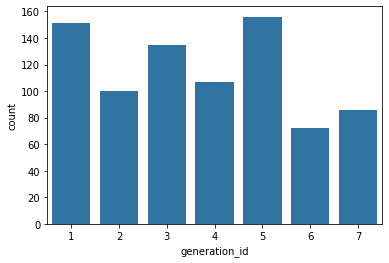

In [3]:
# Get first color_pallete and set it as color of the chart
base_color = sb.color_palette()[0]
# generate graph 
sb.countplot(data = pokemon, x = 'generation_id', color = base_color )

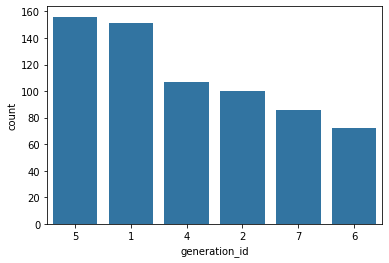

In [4]:
# generate ordered graph
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = (5,1,4,2,7,6) )

In [5]:
# Get order automatically
gen_order = pokemon['generation_id'].value_counts().index

In [6]:
gen_order

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')

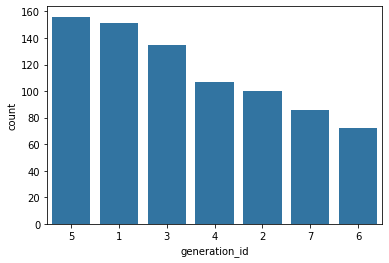

In [7]:
# generate ordered graph
sb.countplot(data = pokemon, x = 'generation_id', color = base_color, order = gen_order );

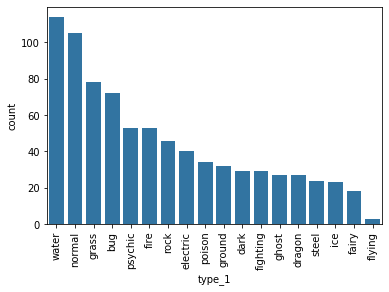

In [8]:
# generate ordered graph for type_1 pokemons
gen_order = pokemon['type_1'].value_counts().index
sb.countplot(data = pokemon, x = 'type_1', color = base_color, order = gen_order );
# rotate values on x axe
plt.xticks(rotation = 90);

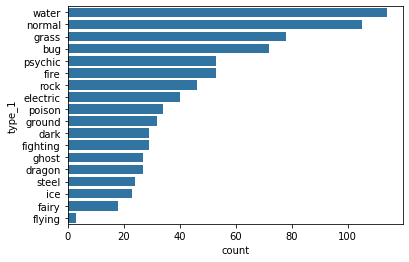

In [9]:
# make horizontal barchar
sb.countplot(data = pokemon,
             y = 'type_1', 
             color = base_color, 
             order = gen_order );

# Absolute vs Relative Frequency

In [15]:
import pandas as pd
import seaborn as sb
pokemon = pd.read_csv('../Matplotlib/data/pokemon.csv')
pokemon.head(10)
pkmn_types = pokemon.melt(id_vars = ['id'],
                         value_vars = ['type_1', 'type_2'],
                         var_name = 'type_level',
                         value_name = 'type')
pkmn_types[802:812]


,id,type_level,type
802,803,type_1,poison
803,804,type_1,poison
804,805,type_1,rock
805,806,type_1,fire
806,807,type_1,electric
807,1,type_2,poison
808,2,type_2,poison
809,3,type_2,poison
810,4,type_2,NaN
811,5,type_2,NaN


In [ ]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

In [ ]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y = 'type', color= base_color, order = type_order)

# Relative way of processing the same data

In [ ]:
# number of pokemons
n_pokemon = pokemon.shape[0]
max_type_count = type_counts[0]
# print(pokemon.shape[0])
max_prop = max_type_count / n_pokemon
# print(max_prop)

In [ ]:
tick_props = np.arange(0, max_prop, 0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

In [ ]:
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, 
             y = 'type', color= base_color, order = type_order)
plt.xticks(tick_props * n_pokemon, tick_names);
plt.xlabel('Proportion');

In [ ]:
n_pokemon = pokemon.shape[0]
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index
base_color = sb.color_palette()[0]
sb.countplot(data=pkmn_types, y = 'type', color= base_color, order = type_order)

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = f'{100*count/n_pokemon:0.2f}%'
    plt.text(count+1,  i, pct_string, va = 'center');

# Counting Missing Data

One interesting way we can apply bar charts is through the visualization of missing data. We can use pandas functions to create a table with the number of missing values in each column


In [ ]:
# What if we want to visualize these missing value counts? We could treat the variable names as levels of 
# a categorical variable, and create a resulting bar plot. However, since the data is not in its tidy, 
# unsummarized form, we need to make use of a different plotting function. Seaborn's barplot function is
# built to depict a summary of one quantitative variable against levels of a second, qualitative variable, 
# but can be used here.

na_counts = pokemon.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts.index.values, na_counts, color = base_color)
plt.xticks(rotation = 90);
# The first argument to the function contains the x-values (column names), the second argument the y-values
# (our counts).


# Pie Charts


In [ ]:
# code for the pie chart seen above
sorted_counts = pokemon['type_2'].value_counts()
plt.pie(sorted_counts, 
        labels = sorted_counts.index, 
        startangle = 90,
        counterclock = False);


In [ ]:
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, wedgeprops = {'width' : 0.4});

# Histograms

## For Quantitative variables

In [ ]:
# bins are "bit wide" on 'X' axis.
bins = np.arange(0, pokemon['speed'].max()+1, 1)
plt.hist(data=pokemon, x='speed', bins=bins);


In [ ]:
sb.distplot(pokemon['speed']);

In [ ]:
sb.distplot(pokemon['speed'], kde=False);

In [ ]:
bin_edges = np.arange(0, pokemon['speed'].max()+1, 1)
sb.distplot(pokemon['speed'], bins=bin_edges, kde=False, 
            hist_kws = {'alpha':1});

# Figures, Axes, and Subplots

In [ ]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .775])
ax.hist(data=pokemon, x = 'speed');


fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .775])
sb.countplot(data=pokemon, x = 'speed', ax=ax);

In [ ]:
plt.figure(figsize = [10, 5]) # larger figure size for subplots

# example of somewhat too-large bin size
plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, pokemon['speed'].max()+4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

# example of somewhat too-small bin size
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, pokemon['speed'].max()+1/4, 1/4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edges);

In [ ]:
fig, axes = plt.subplots(3, 4) # grid of 3x4 subplots
axes = axes.flatten() # reshape from 3x4 array into 12-element vector
for i in range(12):
    plt.sca(axes[i]) # set the current Axes
    plt.text(0.5, 0.5, i+1) # print conventional subplot index number to middle of Axes

# Choosing a Plot for Discrete Data

In [ ]:
plt.figure(figsize = [10, 5])
die_rolls = pokemon['speed']
# histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(die_rolls, bins = bin_edges);
plt.xticks(np.arange(2, 12+1, 1));

# histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges);
plt.xticks(np.arange(2, 12+1, 1));

In [ ]:
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(2, 12+1, 1));

# Descriptive Statistics, Outliers, and Axis Limits

As you create your plots and perform your exploration, make sure that you pay attention to what the plots tell you that go beyond just the basic descriptive statistics. Note any aspects of the data like number of modes and skew, and note the presence of outliers in the data for further investigation.

Related to the latter point, you might need to change the limits or scale of what is plotted to take a closer look at the underlying patterns in the data. This page covers the topic of axis limits; the next the topic of scales and transformations. In order to change a histogram's axis limits, you can add a Matplotlib xlim call to your code. The function takes a tuple of two numbers specifying the upper and lower bounds of the x-axis range. Alternatively, the xlim function can be called with two numeric arguments to the same result.

In [ ]:
# 
plt.figure(figsize = [10, 5])
plt.subplot(1,2,1)
bins = np.arange(0, pokemon['height'].max()+0.5, 0.5)
plt.hist(data=pokemon, x = 'height', bins=bins);

# Zoom in the data with xlim(from 0 to 6).
plt.subplot(1,2,2)
bins = np.arange(0, pokemon['height'].max()+0.2, 0.2)
plt.hist(data=pokemon, x = 'height', bins=bins);
plt.xlim((0,6));

# Scales and Transformations

In [ ]:
plt.figure(figsize = [10, 5])
data = pokemon['speed']
# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, data.max()+100, 100)
plt.hist(data, bins = bin_edges)
plt.xlabel('values')

# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
log_data = np.log10(data) # direct data transform
log_bin_edges = np.arange(0.8, log_data.max()+0.1, 0.1)
plt.hist(log_data, bins = log_bin_edges)
plt.xlabel('log(values)')

In [ ]:
plt.figure(figsize = [10, 5])

# left histogram: data plotted in natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data = pokemon, x = 'weight', bins = bin_edges)
plt.xlabel('weight')


# right histogram: data plotted after direct log transformation
plt.subplot(1, 2, 2)
#log_data = np.log10(pokemon['weight']) # direct data transform
#log_bin_edges = np.arange(0.8, pokemon['weight'].max()+0.1, 0.1)
log_bin_edges = 10 ** np.arange(-1, 3+0.1, 0.1)
plt.hist(data = pokemon, x = 'weight', bins = log_bin_edges);
plt.xscale('log');
plt.xlabel('log(weight)');


#plt.subplot(2, 1, 1)




In [ ]:
bins = 10 ** np.arange(-1, 3+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log');
plt.xlabel('log(weight)');
plt.xticks(ticks, labels);

# Scales and Transformations


Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately log-normal distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. However, after applying a logarithmic transform to the data, the data will follow a normal distribution. (If you need a refresher on the logarithm function, check out this lesson on Khan Academy.)